In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colorectal-cancer-global-dataset-and-predictions/colorectal_cancer_dataset.csv


# 📊 Colorectal Cancer Dataset Analysis

📌 **Author's Profiles:**  
- 🐍 **Kaggle:** [My Kaggle Profile](https://www.kaggle.com/crissyro)  
- 💻 **GitHub:** [My GitHub Profile](https://github.com/crissyro)  

---

## 🏥 Introduction
This dataset provides real-world information on colorectal cancer cases across different countries, covering patient demographics, lifestyle risks, medical history, cancer stage, treatments, survival rates, and healthcare costs. Our analysis focuses on predicting cancer outcomes and identifying key risk factors.

🔗 **Source:** [UCI Machine Learning Repository](https://www.kaggle.com/datasets/ankushpanday2/colorectal-cancer-global-dataset-and-predictions/data)

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv('data/colorectal_cancer_dataset.csv')

print(df.shape)
df.head().style.background_gradient(cmap='Blues', axis=1)

(167497, 28)


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,Physical_Activity,Diabetes,Inflammatory_Bowel_Disease,Genetic_Mutation,Screening_History,Early_Detection,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,Low,Low,No,No,No,Regular,Yes,Combination,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,Moderate,Low,No,No,No,Regular,No,Chemotherapy,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,Low,Low,No,Yes,No,Irregular,No,Chemotherapy,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,High,Low,No,No,No,Regular,No,Surgery,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,Low,Moderate,No,Yes,No,Never,Yes,Surgery,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


## 🔍 Data Preprocessing

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [69]:
df.describe().T.style.background_gradient(cmap='Blues', axis=1)

,count,mean,std,min,25%,50%,75%,max
Patient_ID,167497.000000,83749.000000,48352.363357,1.000000,41875.000000,83749.000000,125623.000000,167497.000000
Age,167497.000000,69.200780,11.872470,30.000000,59.000000,69.000000,79.000000,89.000000
Tumor_Size_mm,167497.000000,42.005708,21.672206,5.000000,23.000000,42.000000,61.000000,79.000000
Healthcare_Costs,167497.000000,72452.168099,27402.779597,25000.000000,48760.000000,72344.000000,96227.000000,119999.000000
Incidence_Rate_per_100K,167497.000000,34.531562,14.447970,10.000000,22.000000,35.000000,47.000000,59.000000
Mortality_Rate_per_100K,167497.000000,17.023875,7.208766,5.000000,11.000000,17.000000,23.000000,29.000000


In [70]:
df.describe(include='object').T

,count,unique,top,freq
Country,167497,16,USA,25927
Gender,167497,2,M,100686
Cancer_Stage,167497,3,Regional,66981
Family_History,167497,2,No,117184
Smoking_History,167497,2,No,100141
Alcohol_Consumption,167497,2,Yes,83857
Obesity_BMI,167497,3,Overweight,67168
Diet_Risk,167497,3,Moderate,83871
Physical_Activity,167497,3,Moderate,67022
Diabetes,167497,2,No,133941


In [71]:
df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [72]:
df = df.drop(columns=['Patient_ID', 'Country'])

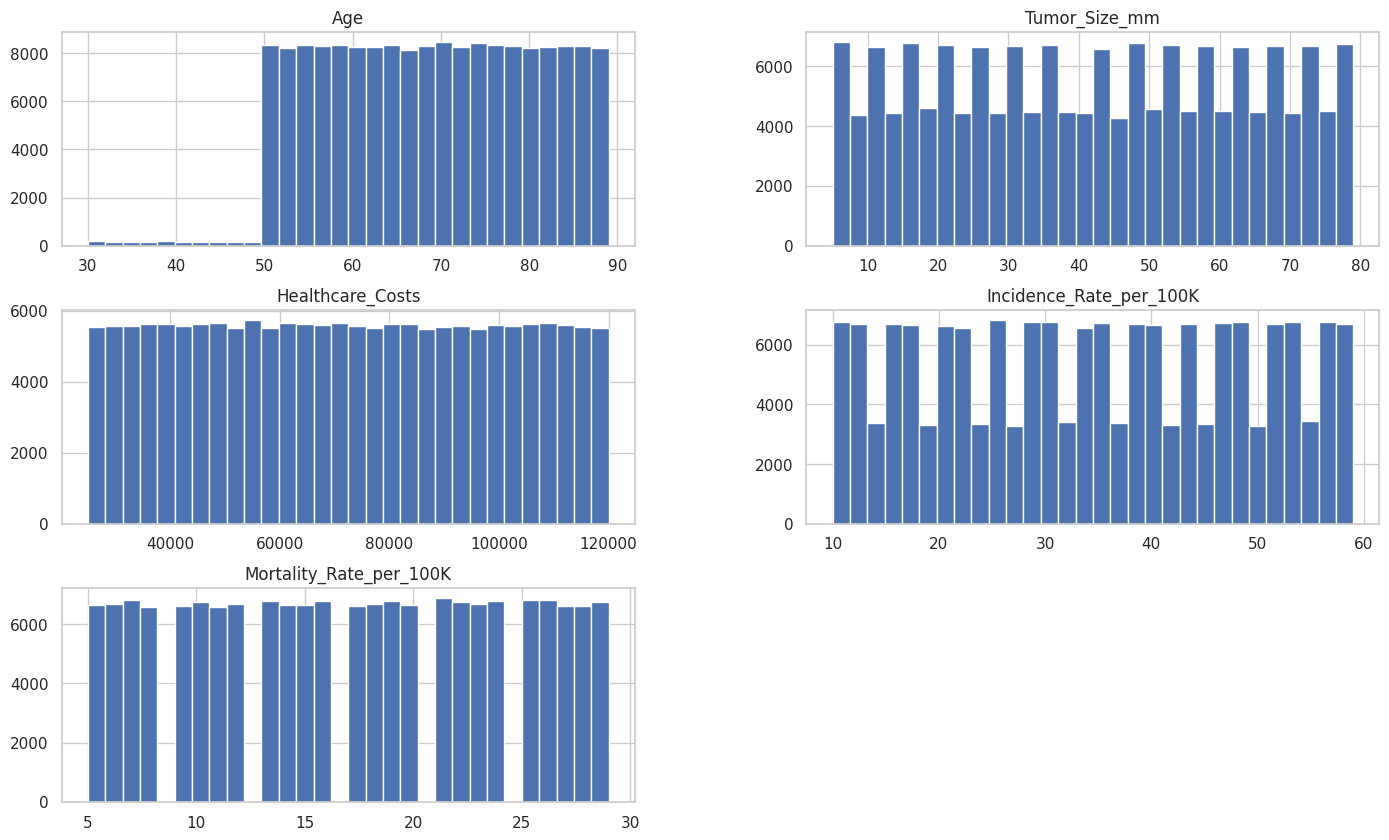

In [73]:
df.hist(bins=30, figsize=(17, 10));

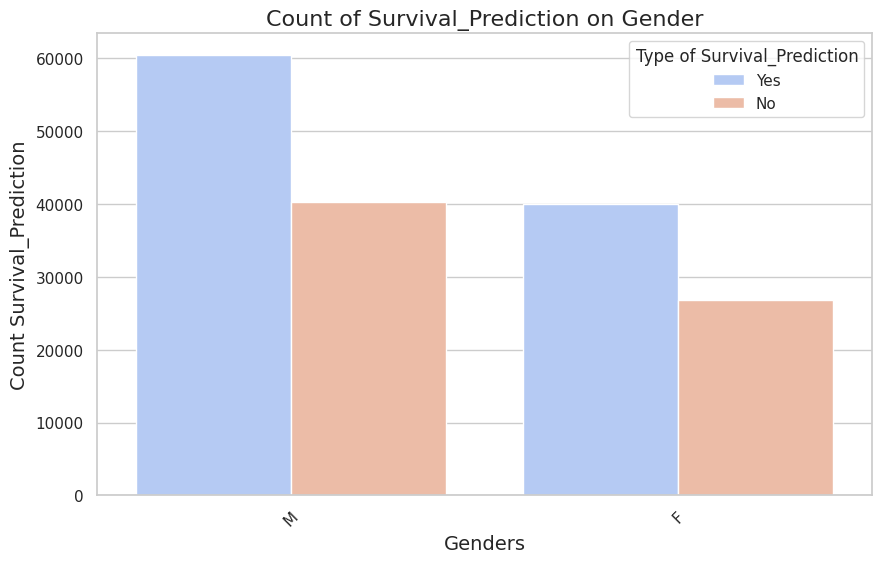

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Survival_Prediction', palette='coolwarm')
plt.title('Count of Survival_Prediction on Gender', fontsize=16)
plt.xlabel('Genders', fontsize=14)
plt.ylabel('Count Survival_Prediction', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type of Survival_Prediction');

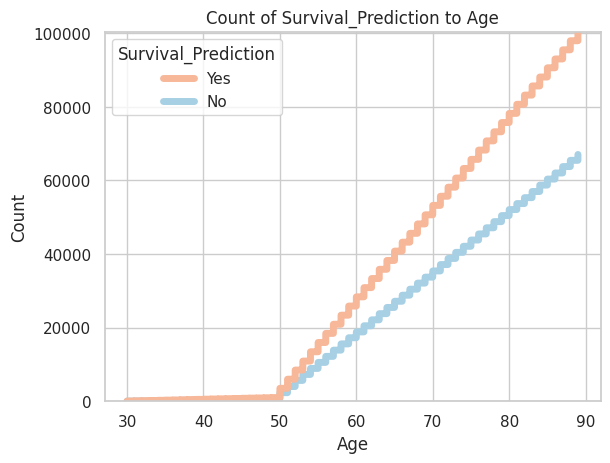

In [75]:
sns.ecdfplot(data=df, x='Age', hue='Survival_Prediction', linewidth=5, palette='RdBu', stat='count')
plt.title('Count of Survival_Prediction to Age');

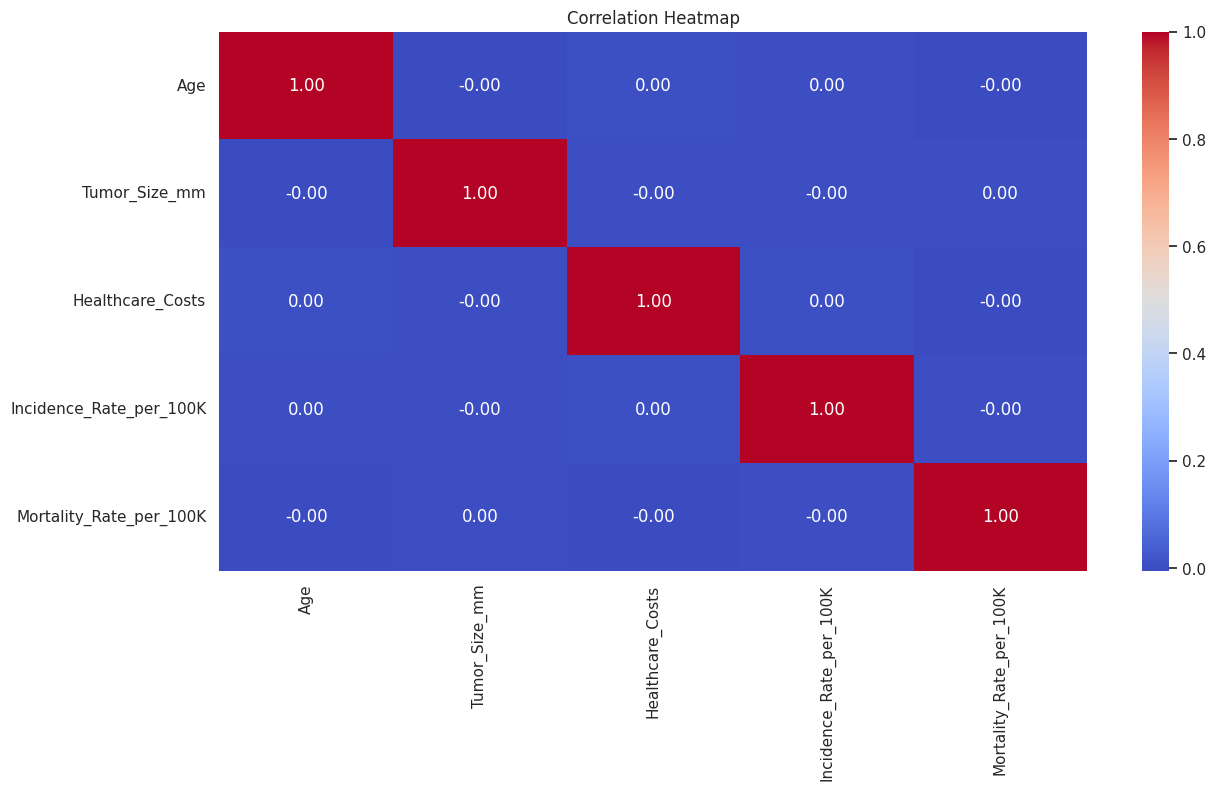

In [104]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Outlier Detection with `Isolation Forest` 🌲  
- Detected and removed anomalies using the Isolation Forest algorithm to improve data quality and

## 🚀 Automated Machine Learning with `H2O AutoML`  
We leveraged `H2O AutoML` to automatically train and evaluate multiple machine learning models for colorectal cancer prediction. The key steps included:
- **Feature Engineering** 🔧: Transforming categorical and numerical variables.
- **Model Training** 🎯: Running multiple ML models, including Gradient Boosting, Random Forest, and Deep Learning.
- **Hyperparameter Optimization** 🔄: Automated selection of the best-performing models.
- **Leaderboard Ranking** 🏆: Evaluating models based on accuracy and other key metrics.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [12]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=np.number).columns

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ])

In [15]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

processed_data = pipeline.fit_transform(df)

In [16]:
iso_forest = IsolationForest(
    n_estimators=200,
    contamination='auto',  
    random_state=42,
    n_jobs=-1
)

outliers = iso_forest.fit_predict(processed_data)

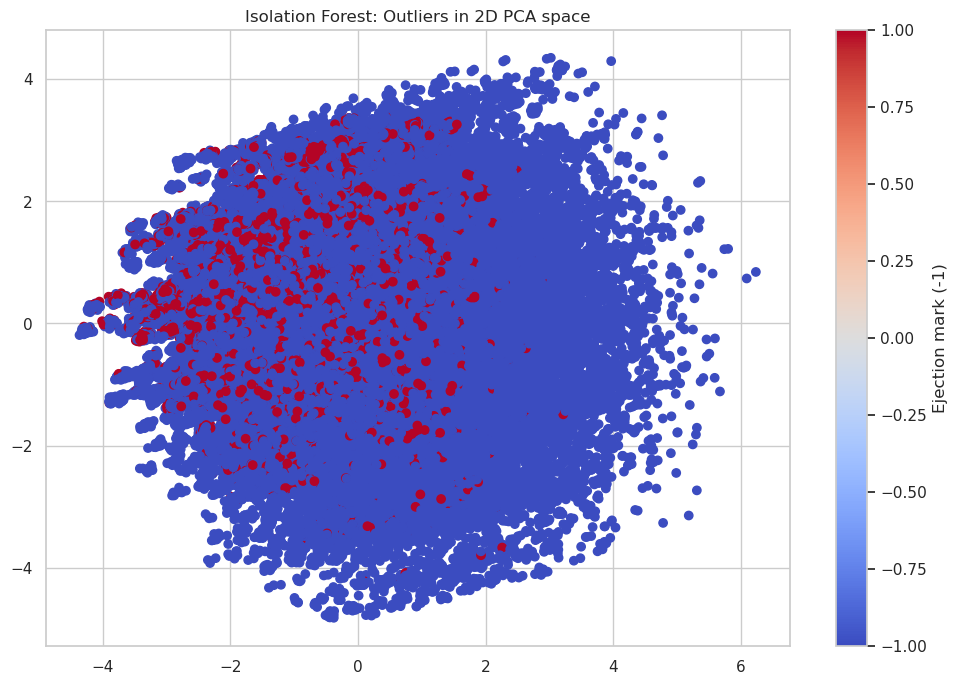

In [17]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)

plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=outliers, cmap='coolwarm')
plt.title('Isolation Forest: Outliers in 2D PCA space')
plt.colorbar(label='Ejection mark (-1)')
plt.show()

In [18]:
clean_df = df[outliers == -1]
outliers_df = df[outliers == 1]

print(f"Emissions detected: {len(outliers_df)} ({len(outliers_df)/len(df)*100:.2f}%)")

Emissions detected: 39409 (23.53%)


In [21]:
if not outliers_df.empty:
    print("\nEmissions statistics:")
    print(outliers_df.describe())
else:
    print("\nNo emissions detected")

df_clean = clean_df.reset_index(drop=True)


Emissions statistics:
          Patient_ID           Age  Tumor_Size_mm  Healthcare_Costs  \
count   39409.000000  39409.000000   39409.000000      39409.000000   
mean    83379.368774     69.152757      41.820346      71979.261615   
std     47113.807993     11.363086      20.769130      26136.591662   
min         1.000000     30.000000       5.000000      25000.000000   
25%     43294.000000     60.000000      24.000000      49988.000000   
50%     83120.000000     69.000000      42.000000      71832.000000   
75%    123126.000000     79.000000      59.000000      93806.000000   
max    167496.000000     89.000000      79.000000     119998.000000   

       Incidence_Rate_per_100K  Mortality_Rate_per_100K  
count             39409.000000             39409.000000  
mean                 34.148342                17.344236  
std                  13.830640                 6.824470  
min                  10.000000                 5.000000  
25%                  23.000000                1

In [22]:
df_clean.shape

(128088, 28)

In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 856.4 kB/s eta 0:00:001m951.2 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 814.4 kB/s eta 0:00:00m eta -:--:--
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8a4bab8d991b6571971dee6849011fd973e104868dd51914a295b961348fd3b6
  Stored in directory: /home/crissyro/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [3]:
from ydata_profiling import ProfileReport

In [23]:
profile = ProfileReport(
    df_clean,
    title="COVID Deaths EDA Report",
    html={'style': {'full_width': True}}, 
    minimal=True,
    explorative=True
)

profile.to_file("report.html")
profile.to_notebook_iframe()
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [96]:
h2o.init(nthreads=-1, max_mem_size='8G')  

hf = h2o.H2OFrame(df_clean)

target = "Survival_Prediction"
predictors = [x for x in hf.columns if x != target]

if hf[target].isfactor()[0]:
    hf[target] = hf[target].asfactor()
else:
    hf[target] = hf[target].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,7 mins 04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_9i1bb2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [98]:
train, test = hf.split_frame(ratios=[0.8], seed=42)

In [99]:
aml = H2OAutoML(
    max_runtime_secs=3600,  
    exclude_algos=["DeepLearning"], 
    seed=42,
    stopping_metric="auto",
    sort_metric="auto",
    balance_classes=True,  
    nfolds=5,  
    verbosity="info"
)

aml.train(x=predictors, y=target, training_frame=train)

AutoML progress: |
20:20:09.875: Project: AutoML_1_20250309_202009
20:20:09.876: Setting stopping tolerance adaptively based on the training frame: 0.002738143920522741
20:20:09.877: Build control seed: 42
20:20:09.878: training frame: Frame key: AutoML_1_20250309_202009_training_py_7_sid_9547    cols: 26    rows: 133379  chunks: 8    size: 2329627  checksum: -7723453322672550243
20:20:09.878: validation frame: NULL
20:20:09.878: leaderboard frame: NULL
20:20:09.878: blending frame: NULL
20:20:09.878: response column: Survival_Prediction
20:20:09.878: fold column: null
20:20:09.879: weights column: null
20:20:09.908: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20250309_202009_model_48


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.17377385867221895
RMSE: 0.4168619179922999
LogLoss: 0.5268872970741951
Mean Per-Class Error: 0.2669084237905698
AUC: 0.8465179600225947
AUCPR: 0.8876182335438662
Gini: 0.6930359200451894

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5129667607924113
       No     Yes    Error    Rate
-----  -----  -----  -------  ------------------
No     30438  23274  0.4333   (23274.0/53712.0)
Yes    8007   71660  0.1005   (8007.0/79667.0)
Total  38445  94934  0.2345   (31281.0/133379.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.512967     0.820843  237
max f2                       0.39818      0.898007  299
max f0point5                 0.615089     0.814237  171
max accuracy                 0.541822     0.770803  219
max precision                0.986185     1         0
max recall                   0.0918676    1         393
max specificity              0.986185     1         0
max absolute_mcc             0.565982     0.519449  204
max min_per_class_accuracy   0.587297     0.759365  190
max mean_per_class_accuracy  0.585645     0.761269  191
max tns                      0.986185     53712     0
max fns                      0.986185     79660     0
max fps                      0.0184749    53712     399
max tps                      0.0918676    79667     393
max tnr                      0.986185     1         0
max fnr                      0.986185     0.999912  0
max fpr                      0.0184749    1         399
max tpr                      0.0918676    1         393

Gains/Lift Table: Avg response rate: 59.73 %, avg score: 59.56 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100016                   0.906833           1.67295   1.67295            0.99925          0.928133  0.99925                     0.928133            0.0167321       0.0167321                  67.2951   67.2951            0.0167135
2        0.0200031                   0.882653           1.66166   1.6673             0.992504         0.893529  0.995877                    0.910831            0.0166192       0.0333513                  66.1656   66.7304            0.0331465
3        0.0300047                   0.865987           1.65413   1.66291            0.988006         0.873937  0.993253                    0.898533            0.0165439       0.0498952                  65.4126   66.2911            0.0493925
4        0.0400063                   0.852791           1.62903   1.65444            0.973013         0.859236  0.988193                    0.888709            0.0162928       0.066188                   62.9025   65.444             0.0650151
5        0.0500004                   0.841294           1.64783   1.65312            0.984246         0.846997  0.987404                    0.880371            0.0164686       0.0826566                  64.7831   65.3119            0.0810927
6        0.100001                    0.797828           1.61722   1.63517            0.965962         0.818231  0.976683                    0.849301            0.0808616       0.163518                   61.722    63.5169            0.157728
7        0.150001                    0.765323           1.5717

## 📈 Performance Metrics
The evaluation was based on the following metrics:
- **ROC AUC** 📊: Discriminatory power of the models.

In [100]:
lb = aml.leaderboard
print("Models leaderboard:")
print(lb.head())

Models leaderboard:
model_id                                                                       auc    logloss     aucpr    mean_per_class_error      rmse       mse
XGBoost_grid_1_AutoML_1_20250309_202009_model_48                          0.502126   0.726749  0.59814                 0.5       0.511922  0.262064
XGBoost_grid_1_AutoML_1_20250309_202009_model_50                          0.50155    0.685332  0.597923                0.5       0.495753  0.245771
GBM_4_AutoML_1_20250309_202009                                            0.501477   0.677335  0.598087                0.5       0.491979  0.242043
XGBoost_lr_search_selection_AutoML_1_20250309_202009_select_grid_model_1  0.501244   0.818598  0.597674                0.499923  0.539479  0.291037
DRF_1_AutoML_1_20250309_202009                                            0.501138   0.68772   0.59752                 0.5       0.496462  0.246475
XGBoost_grid_1_AutoML_1_20250309_202009_model_10                          0.500897   0.72958

In [103]:
h2o.cluster().shutdown()

H2O session _sid_9547 closed.


## 📌 Conclusion
By combining **Isolation Forest** for outlier detection and **H2O AutoML** for automated model training, we created a powerful pipeline for colorectal cancer prediction. This analysis provides insights that could aid medical professionals in early diagnosis and personalized treatment planning.

📢 **Thank you for your time and attention!** If you have any suggestions or improvements, feel free to reach out! Your feedback is highly appreciated. 🎯  

💬 **Comments & Discussions are welcome!** Let's improve this analysis together. 🚀  